In [1]:
from tgp.gp_predictor import GPPredictor
from tgp.rbf_kernel import RBFKernel
from tgp.matern_kernels import MaternKernel32, MaternKernel12
from tgp.brownian_kernel import BrownianKernel
from tgp.summed_kernel import SummedKernel
from tgp.bias_kernel import BiasKernel
from tgp.mlp_kernel import MLPKernel
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#[0.01 3.  ]
#[0.01       0.08188141 0.46761428]
#-15078.82064999154
#13170.096365923968

#kernel = SummedKernel([
#    MaternKernel32(np.array([3.5566]), 0.344),
#    MaternKernel32(np.array([4.5202]), 0.378)
#])

kernel = SummedKernel([
#    MaternKernel12(np.array([6.989]), 0.751),
    MaternKernel32(np.array([5.29]), 0.882)
])

#kernel = MLPKernel(np.array([1.48996238]), 9.62208874, 0.5888992)

#kernel = SummedKernel([
#    MLPKernel(np.array([0.90334729]), 4.26640103, 0.5604109),
#    MLPKernel(np.array([9.39022399]), 9.4369357,  0.13954155)
#])


#pred_x = predictor.X
#pred_s = predictor.s
#pred_e = predictor.e

In [3]:
#computed = kernel.calculate(pred_x[pred_s[0]:pred_e[0]], pred_x[pred_s[0]:pred_e[0]])

In [4]:
# Get some data
from tdata.datasets.oncourt_dataset import OnCourtDataset

In [5]:
dataset = OnCourtDataset()

/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
df = dataset.get_stats_df()

In [7]:
df.tail()

ID1  \
winner         loser              round tournament_name             year          
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019  20193   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019   5992   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019    677   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019   5992   
               Rafael Nadal       12    Australian Open - Melbourne 2019   5992   

                                                                            ID2  \
winner         loser              round tournament_name             year          
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019  11704   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019   8806   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019  30470   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019  20193   
               Rafael Nadal       12    Australian Open - Melbourne 2019    677   

                                                                           ID_T  \
winner         loser              round tournament_name             year          
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019  15606   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019  15606   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019  15606   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019  15606   
               Rafael Nadal       12    Australian Open - Melbourne 2019  15606   

                                                                          round  \
winner         loser              round tournament_name             year          
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019      9   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019      9   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019     10   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019     10   
               Rafael Nadal       12    Australian Open - Melbourne 2019     12   

                                                                                          score  \
winner         loser              round tournament_name             year                          
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019  7-6(4) 6-3 6-7(2) 6-4   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019           6-1 4-1 ret.   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019            6-2 6-4 6-0   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019            6-0 6-2 6-2   
               Rafael Nadal       12    Australian Open - Melbourne 2019            6-3 6-2 6-3   

                                                                         start_date  \
winner         loser              round tournament_name             year              
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019 2019-01-23   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019 2019-01-23   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019 2019-01-24   
Novak Djokovic Lucas Pouille      10    Australian Open - Melbourne 2019 2019-01-25   
               Rafael Nadal       12    Australian Open - Melbourne 2019 2019-01-27   

                                                                          tournament_rank  \
winner         loser              round tournament_name             year                    
Lucas Pouille  Milos Raonic       9     Australian Open - Melbourne 2019                4   
Novak Djokovic Kei Nishikori      9     Australian Open - Melbourne 2019                4   
Rafael Nadal   Stefanos Tsitsipas 10    Australian Open - Melbourne 2019

In [28]:
recent = df.query("""
    year >= 2016 & year <= 2018
""")

In [29]:
winners = recent['winner'].values
losers = recent['loser'].values
days_since_start = (recent['start_date'] - 
                    recent['start_date'].min()).dt.days.values

In [30]:
predictor = GPPredictor(kernel)
predictor.fit(winners, losers, days_since_start)

-61191.30184405044


In [31]:
# Look at some players
fhat = predictor.f_hat

In [32]:

from datetime import timedelta

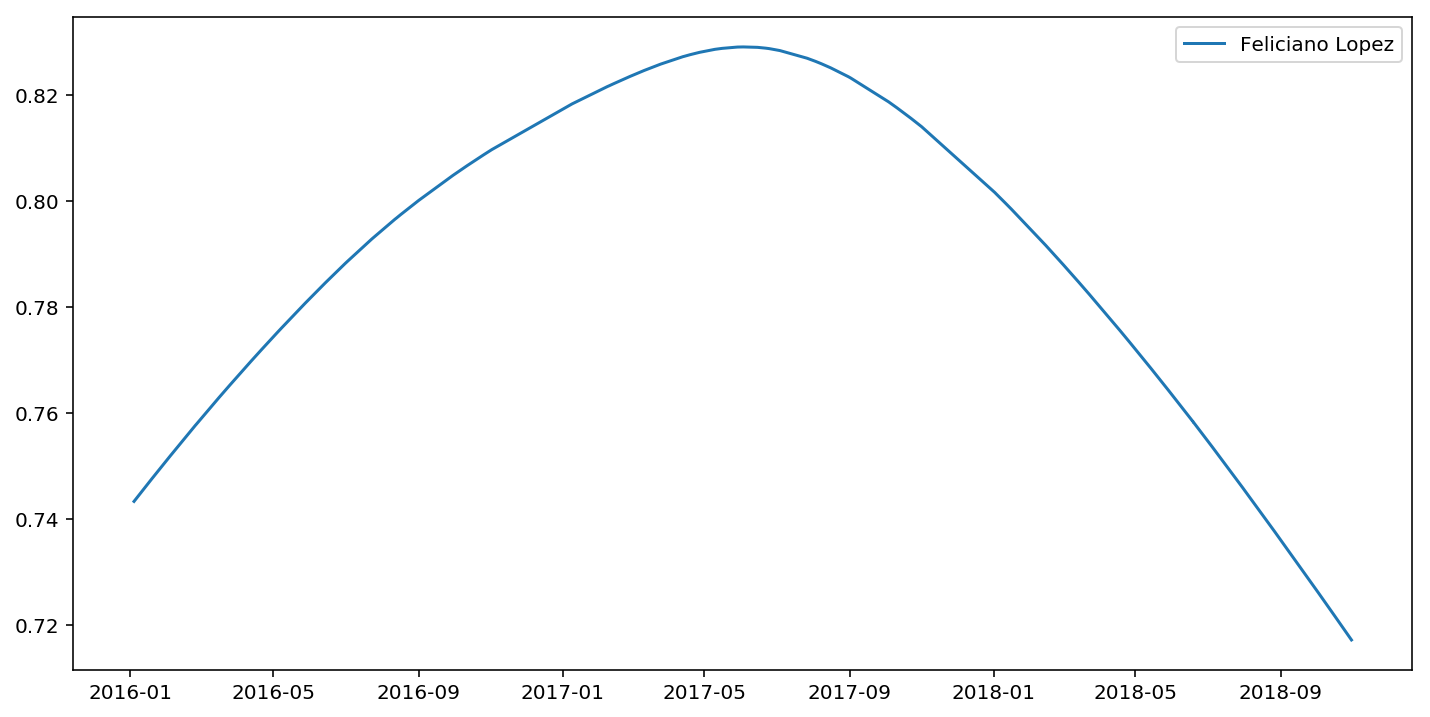

In [33]:
# Find the player of interest
players = ['Feliciano Lopez']

for p in players:

    p_id = predictor.encoder.transform([p])[0]

    p_s = predictor.s[p_id]
    p_e = predictor.e[p_id]

    fs = fhat[p_s:p_e]
    x = predictor.X[p_s:p_e] * predictor.divide_by

    dates = [recent['start_date'].min() + timedelta(days=cur_x)
             for cur_x in x.reshape(-1)]

    plt.plot(dates, fs, label=p)

plt.legend()
plt.gcf().set_size_inches(12, 6)

In [34]:
# Find final ratings for everyone
final_ratings = {cur_player: fhat[cur_x - 1] for cur_x, cur_player, cur_start in zip(predictor.e, predictor.encoder.classes_, predictor.s)}

In [35]:
import pandas as pd

pd.Series(final_ratings).sort_values(ascending=False)

Rafael Nadal                   2.993194
Roger Federer                  2.580567
Novak Djokovic                 2.481417
Juan Martin Del Potro          2.231790
Alexander Zverev               1.988087
Kei Nishikori                  1.774618
Marin Cilic                    1.749920
Kevin Anderson                 1.707506
Dominic Thiem                  1.622834
Karen Khachanov                1.476576
David Goffin                   1.459536
Andy Murray                    1.450090
Borna Coric                    1.354717
Nick Kyrgios                   1.290748
Fabio Fognini                  1.265914
John Isner                     1.255703
Stefanos Tsitsipas             1.239263
Grigor Dimitrov                1.236460
Roberto Bautista Agut          1.234403
Daniil Medvedev                1.209466
Kyle Edmund                    1.185896
Milos Raonic                   1.178349
Richard Gasquet                1.091350
Hyeon Chung                    1.049983
Martin Klizan                  1.024231


In [36]:
predictor.predict('Simone Bolelli', 200)

(-0.25041071321023084, 0.45136171143747567)

In [37]:
to_plot = 'Feliciano Lopez'
days = np.linspace(days_since_start.min(), days_since_start.max(), 20)
s_res = list()
    
for cur_days in days:

    pred_mean, pred_sd = predictor.predict(to_plot, cur_days)

    s_res.append({'days': cur_days, 'player': to_plot,
                  'mean': pred_mean, 'sd': pred_sd})
    
s_res = pd.DataFrame(s_res)
s_res['date'] = recent['start_date'].min() + pd.to_timedelta(s_res['days'], unit='D')

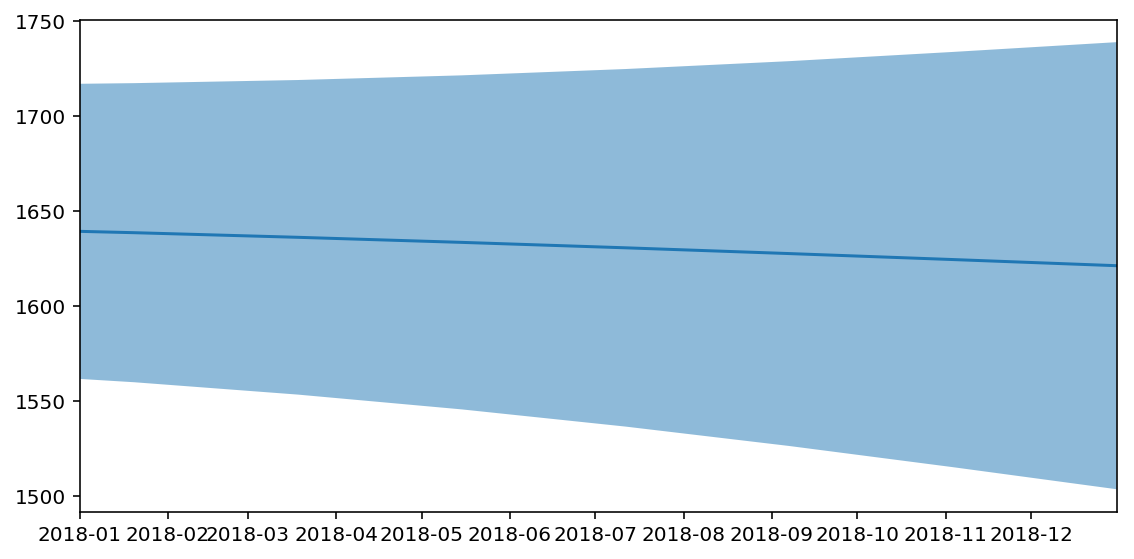

In [44]:
from tpr.models.utils import plot_with_error_bars, to_elo_scale
from datetime import datetime

f, ax = plt.subplots(1, 1)

plot_with_error_bars(s_res['date'].values, to_elo_scale(s_res['mean'] - 2 * s_res['sd']), 
                     to_elo_scale(s_res['mean']), to_elo_scale(s_res['mean'] + 2 * s_res['sd']), ax=ax)

ax.set_xlim(datetime(2018, 1, 1), datetime(2018, 12, 31))

f.set_size_inches(8, 4)
f.tight_layout()